# Algoritmo de ST para o setor elétrico

## Trata-se do desenvolvimento de um algoritmo criado a partir da abordagem de ML (Machine Learning) capaz de prever o número de acidentes/incidentes de trabalho que ocorrerão num mês para uma distribuidora de energia do setor elétrico brasileiro.

### Importação das bibliotecas Python necessárias:

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics # Avaliação do Erro
from math import sqrt
from sklearn.metrics import mean_absolute_error # métrica de avaliação do erro médio absoluto
from sklearn.metrics import mean_squared_error # métrica de avaliação do erro médio quadrático
from sklearn.neural_network import MLPRegressor #Biblioteca de RNA para Regressão
from sklearn.linear_model import LinearRegression #Biblioteca de Regressão Linear Simples
from sklearn.preprocessing import StandardScaler # Biblioteca para Normalização do conj. de dados
from sklearn.tree import DecisionTreeRegressor #Biblioteca de Regressão por Árvore de Decisão
from sklearn.ensemble import RandomForestRegressor #Biblioteca de Random Forest
from xgboost import XGBRegressor # Biblioteca XGBoost
from sklearn.model_selection import train_test_split #Separação em dados de Treino/Teste
import matplotlib.pyplot as plt # Biblioteca para impressão dos gráficos
import seaborn as sns

### Leitura e apresentação da base de dados

In [2]:
dataset = pd.read_csv(r'C:\Users\andre\base10.csv', encoding='ISO-8859-1', sep=';')

dataset.head() #leitura das 5 primeiras linhas da base de dados

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,...,ELEKTRO - SÃO JOÃO DA BOA VISTA,ELEKTRO - SÃO LUIZ DO PARAITINGA,ELEKTRO - SEDE,ELEKTRO - TATUÍ,ELEKTRO - TEODORO SAMPAIO,ELEKTRO - TIETÊ,ELEKTRO - TRÊS LAGOAS,ELEKTRO - UBATUBA,ELEKTRO - VOTUPORANGA,Qtde acidentes por mes por UTD
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
dataset.info() #nome de cada coluna, número de linhas por coluna e o tipo de dado de cada coluna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 62 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Janeiro                           2279 non-null   int64
 1   Fevereiro                         2279 non-null   int64
 2   Março                             2279 non-null   int64
 3   Abril                             2279 non-null   int64
 4   Maio                              2279 non-null   int64
 5   Junho                             2279 non-null   int64
 6   Julho                             2279 non-null   int64
 7   Agosto                            2279 non-null   int64
 8   Setembro                          2279 non-null   int64
 9   Outubro                           2279 non-null   int64
 10  Novembro                          2279 non-null   int64
 11  Dezembro                          2279 non-null   int64
 12  Urbano                            

### Visualização inicial dos dados

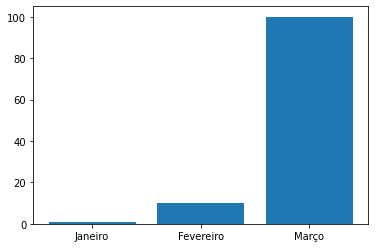

In [4]:
# UTD Andradina
meses = ['Janeiro', 'Fevereiro', 'Março']
registros = [1, 10, 100]
plt.bar(meses, registros)
plt.show()

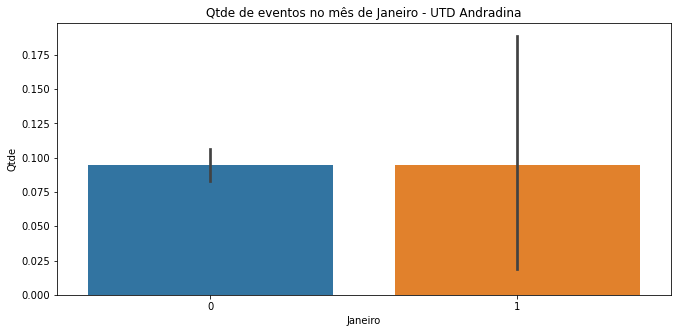

In [5]:
plt.figure(figsize=(11,5))
sns.barplot(x='ELEKTRO - ANDRADINA', y='Janeiro', data=dataset,)
plt.title("Qtde de eventos no mês de Janeiro - UTD Andradina")
plt.xlabel('Janeiro')
plt.ylabel('Qtde')
plt.show()

### Análise de correlação da base de dados

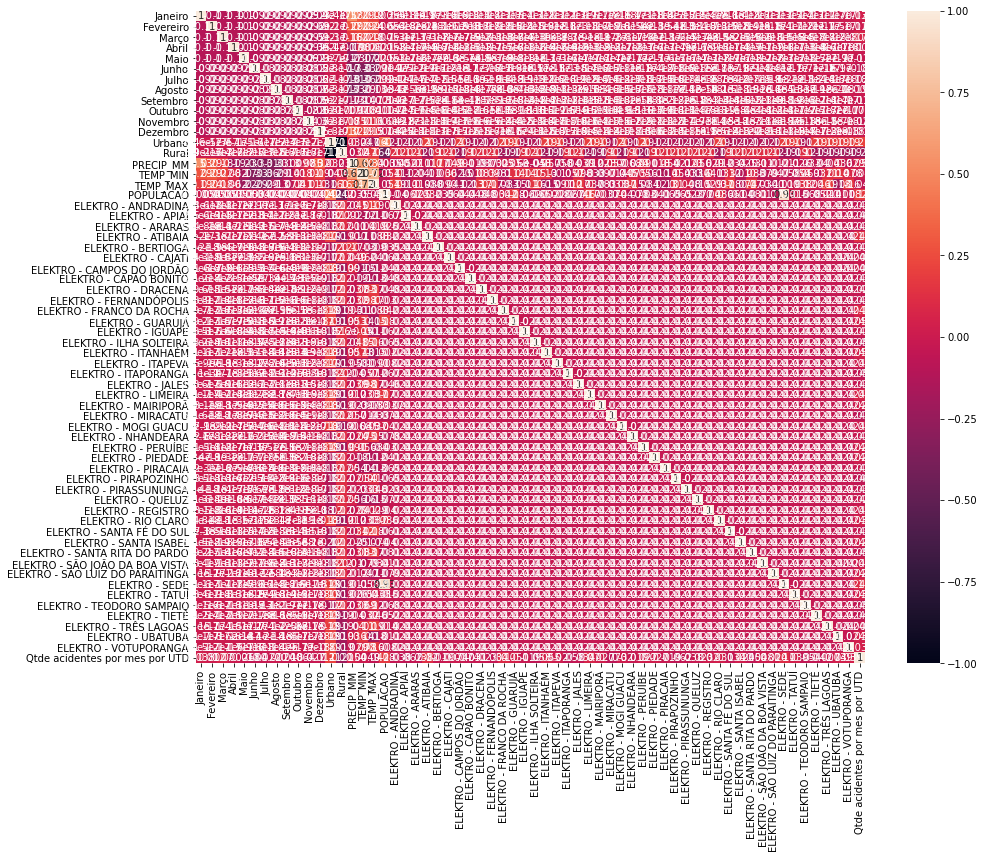

In [6]:
dataset.corr()

figure = plt.figure(figsize=(15,12))
sns.heatmap(dataset.corr(), annot=True);

### Seleção das variáveis de entrada e de saída

In [7]:
X = dataset.iloc[:,:-1].values # seleção das variáveis preditoras ou independentes ou entradas
y = dataset.iloc[:,-1].values # variável alvo ou saída
X.shape, y.shape # quantas linhas e colunas possuem as variáveis X e y

((2279, 61), (2279,))

### Normalização do conjunto de dados

In [8]:
scaleX = StandardScaler()
X_N = scaleX.fit_transform (X)
print (X_N) # mostra os dados normalizados

[[ 3.09838668 -0.32274861 -0.32274861 ... -0.15430335 -0.15430335
  -0.15430335]
 [ 3.09838668 -0.32274861 -0.32274861 ... -0.15430335 -0.15430335
  -0.15430335]
 [ 3.09838668 -0.32274861 -0.32274861 ... -0.15430335 -0.15430335
  -0.15430335]
 ...
 [-0.32274861 -0.32274861 -0.32274861 ...  6.4807407  -0.15430335
  -0.15430335]
 [-0.32274861 -0.32274861 -0.32274861 ... -0.15430335  6.4807407
  -0.15430335]
 [-0.32274861 -0.32274861 -0.32274861 ... -0.15430335 -0.15430335
   6.4807407 ]]


## 1º Modelo: Regressão Linear

### Separando os conjuntos de dados de treino e teste 

#### Dados brutos

In [9]:
X_RL = X
y_RL = y
X_train_RL, X_test_RL, y_train_RL, y_test_RL = train_test_split(X_RL, y_RL, test_size = 0.3, random_state=0)
X_train_RL.shape, X_test_RL.shape, y_train_RL.shape, y_test_RL.shape # mostra qtde de linhas e colunas de cada variável de treino e teste

((1595, 61), (684, 61), (1595,), (684,))

#### Dados normalizados

In [10]:
X_RL_N = X_N
y_RL_N = y
X_train_RL_N, X_test_RL_N, y_train_RL_N, y_test_RL_N = train_test_split(X_RL_N, y_RL_N, test_size = 0.3, random_state=0)
X_train_RL_N.shape, X_test_RL_N.shape, y_train_RL_N.shape, y_test_RL_N.shape # mostra qtde de linhas e colunas de cada variável de treino e teste

((1595, 61), (684, 61), (1595,), (684,))

### Associação do modelo para cada conjunto de dados (brutos e normalizados)

In [11]:
regressor = LinearRegression()
regressor_N = LinearRegression()

### Treinamento do modelo

#### Dados brutos 

In [12]:
regressor.fit(X_train_RL, y_train_RL)

LinearRegression()

#### Dados normalizados

In [13]:
regressor_N.fit(X_train_RL_N, y_train_RL_N)

LinearRegression()

### Aplicação do modelo em dados de teste

#### Dados brutos

In [14]:
y_expected_RL  = y_test_RL # saída esperada
y_predicted_RL = regressor.predict(X_test_RL) # saída prevista pelo modelo

#### Dados normalizados

In [15]:
y_expected_RL_N  = y_test_RL_N # saída esperada
y_predicted_RL_N = regressor_N.predict(X_test_RL_N) # saída prevista pelo modelo

### Análise gráfica de desempenho do modelo (real x previstos)

#### Dados brutos

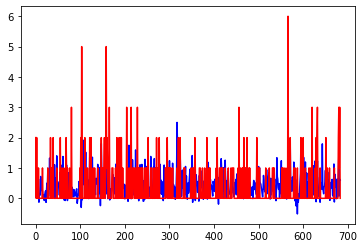

In [16]:
plt.plot(y_predicted_RL, '-', color='blue', label= 'Valores Previstos')
plt.plot(y_expected_RL, '-', color = 'red', label= 'Valores Reais')

#### Dados normalizados

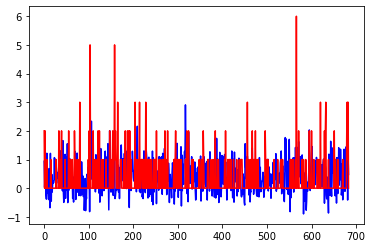

In [17]:
plt.plot(y_predicted_RL_N, '-', color='blue', label= 'Valores Previstos')
plt.plot(y_expected_RL_N, '-', color = 'red', label= 'Valores Reais')

### Avaliação de desempenho do modelo - MAE, MSE e RMSE

#### Dados brutos

In [18]:
MAE_RL = mean_absolute_error (y_expected_RL, y_predicted_RL)
print ("MAE_RL = {:0.3f}".format(MAE_RL))

MAE_RL = 0.533


In [19]:
MSE_RL = mean_squared_error (y_expected_RL, y_predicted_RL)
print ("MSE_RL = {:0.3f}".format(MSE_RL))

MSE_RL = 0.567


In [20]:
RMSE_RL = np.sqrt(MSE_RL)
print ("RMSE_RL = {:0.3f}".format(RMSE_RL))

RMSE_RL = 0.753


#### Dados normalizados

In [21]:
MAE_RL_N = mean_absolute_error (y_expected_RL_N, y_predicted_RL_N)
print ("MAE_RL_N = {:0.3f}".format(MAE_RL_N))

MAE_RL_N = 0.638


In [22]:
MSE_RL_N = mean_squared_error (y_expected_RL_N, y_predicted_RL_N)
print ("MSE_RL_N = {:0.3f}".format(MSE_RL_N))

MSE_RL_N = 0.741


In [23]:
RMSE_RL_N = np.sqrt(MSE_RL_N)
print ("RMSE_RL_N = {:0.3f}".format(RMSE_RL_N))

RMSE_RL_N = 0.861


## 2º Modelo: RNA de Múltiplas Camadas - MLP

### Redefinição das variáveis de entrada e de saída

#### Dados brutos

In [24]:
X_RNA = X
y_RNA = y
X_train_RNA, X_test_RNA, y_train_RNA, y_test_RNA = train_test_split(X_RNA, y_RNA, test_size=0.30, random_state=0)
X_train_RNA.shape, X_test_RNA.shape, y_train_RNA.shape, y_test_RNA.shape

((1595, 61), (684, 61), (1595,), (684,))

#### Dados normalizados

In [25]:
X_RNA_N = X_N
y_RNA_N = y
X_train_RNA_N, X_test_RNA_N, y_train_RNA_N, y_test_RNA_N = train_test_split(X_RNA_N, y_RNA_N, test_size=0.30, random_state=0)
X_train_RNA_N.shape, X_test_RNA_N.shape, y_train_RNA_N.shape, y_test_RNA_N.shape

((1595, 61), (684, 61), (1595,), (684,))

### Regressão usando redes MLP

In [26]:
n_layers = 1 # número de camadas ocultas (>=1)
n_elements_layer = 4 # número de neurônios ocultos em cada camada
layer_size = (n_elements_layer, )
for i in range (0,n_layers-1):
    layer_size += (n_elements_layer, ) # define nº de neurônios em cada camada oculta 

#### Ajuste da rede aos dados - Dados brutos

In [27]:
RNA = MLPRegressor(verbose=False,
                           random_state = 0,
                           hidden_layer_sizes = layer_size,
                           max_iter= 1000000,
                           activation="relu",
                           tol=0.000001,
                           learning_rate_init = 0.001)

#### Ajuste da rede aos dados - Dados normalizados

In [28]:
RNA_N = MLPRegressor(verbose=False,
                           max_iter= 1000000,
                           activation="relu",
                           tol=0.000001,
                           learning_rate_init=0.001)

### Treinamento do modelo

#### Dados brutos

In [29]:
RNA.fit(X_train_RNA, y_train_RNA)

MLPRegressor(hidden_layer_sizes=(4,), max_iter=1000000, random_state=0,
             tol=1e-06)

#### Dados normalizados

In [30]:
RNA_N.fit(X_train_RNA_N, y_train_RNA_N)

MLPRegressor(max_iter=1000000, tol=1e-06)

### Aplicação do modelo em dados do conjunto de teste

#### Dados brutos

In [31]:
y_expected_RNA  = y_test_RNA # saída esperada
y_predicted_RNA = RNA.predict(X_test_RNA) # saída prevista pelo modelo

#### Dados normalizados

In [32]:
y_expected_RNA_N  = y_test_RNA_N # saída esperada
y_predicted_RNA_N = RNA_N.predict(X_test_RNA_N) # saída prevista pelo modelo

### Análise gráfica de desempenho (real x previstos)

#### Dados brutos

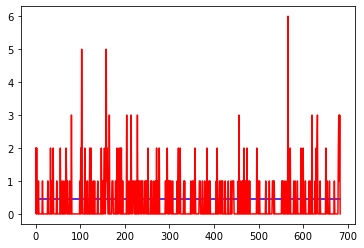

In [33]:
plt.plot(y_predicted_RNA, '-', color='blue', label= 'Valores Previstos')
plt.plot(y_expected_RNA, '-', color = 'red', label= 'Valores Reais')

#### Dados normalizados

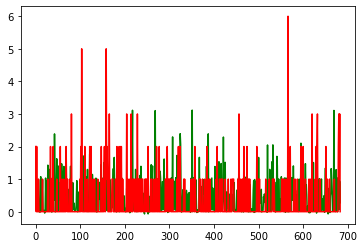

In [34]:
plt.plot(y_predicted_RNA_N, '-', color='green', label= 'Valores Previstos')
plt.plot(y_expected_RNA_N, '-', color = 'red', label= 'Valores Reais')

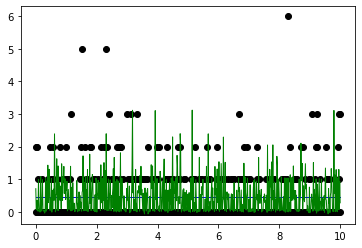

In [35]:
plt.scatter(np.linspace(0, 10, num=(y_test_RNA.size)),y_test_RNA,  color='black')
plt.plot(np.linspace(0, 10, num=(y_test_RNA.size)),RNA.predict(X_test_RNA), color='blue', linewidth=1)
plt.plot(np.linspace(0, 10, num=(y_test_RNA_N.size)),RNA_N.predict(X_test_RNA_N), color='green', linewidth=1)
plt.show()

### Avaliação de desempenho do modelo - MAE, MSE e RMSE

#### Dados brutos

In [36]:
MAE_RNA = mean_absolute_error (y_expected_RNA, y_predicted_RNA)
print ("MAE_RNA = {:0.3f}".format(MAE_RNA))

MAE_RNA = 0.572


In [37]:
MSE_RNA = mean_squared_error (y_expected_RNA, y_predicted_RNA)
print ("MSE_RNA = {:0.3f}".format(MSE_RNA))

MSE_RNA = 0.532


In [38]:
RMSE_RNA = np.sqrt(MSE_RNA)
print ("RMSE_RNA = {:0.3f}".format(RMSE_RNA))

RMSE_RNA = 0.729


#### Dados normalizados

In [39]:
MAE_RNA_N = mean_absolute_error (y_expected_RNA_N, y_predicted_RNA_N)
print ("MAE_RNA_N = {:0.3f}".format(MAE_RNA_N))

MAE_RNA_N = 0.587


In [40]:
MSE_RNA_N = mean_squared_error (y_expected_RNA_N, y_predicted_RNA_N)
print ("MSE_RNA_N = {:0.3f}".format(MSE_RNA_N))

MSE_RNA_N = 0.739


In [41]:
RMSE_RNA_N = np.sqrt(MSE_RNA_N)
print ("RMSE_RNA_N = {:0.3f}".format(RMSE_RNA_N))

RMSE_RNA_N = 0.859


## 3º Modelo: Árvore de Decisão

### Redefinição das variáveis de entrada e de saída

#### Dados brutos

In [42]:
X_Tree = X
y_Tree = y
X_train_Tree, X_test_Tree, y_train_Tree, y_test_Tree = train_test_split(X_Tree, y_Tree, test_size=0.30, random_state=0)
X_train_Tree.shape, X_test_Tree.shape, y_train_Tree.shape, y_test_Tree.shape

((1595, 61), (684, 61), (1595,), (684,))

#### Dados normalizados

In [43]:
X_Tree_N = X_N
y_Tree_N = y
X_train_Tree_N, X_test_Tree_N, y_train_Tree_N, y_test_Tree_N = train_test_split(X_Tree_N, y_Tree_N, test_size=0.30, random_state=0)
X_train_Tree_N.shape, X_test_Tree_N.shape, y_train_Tree_N.shape, y_test_Tree_N.shape

((1595, 61), (684, 61), (1595,), (684,))

### Associação do Modelo

#### Dados brutos

In [44]:
RegTree = DecisionTreeRegressor()
RegTree.fit(X_train_Tree, y_train_Tree)
y_predicted_Tree = RegTree.predict(X_test_Tree)

#### Dados normalizados

In [45]:
RegTree_N = DecisionTreeRegressor()
RegTree_N.fit(X_train_Tree_N, y_train_Tree_N)
y_predicted_Tree_N = RegTree_N.predict(X_test_Tree_N)

### Gráfico de Previsão

#### Dados brutos

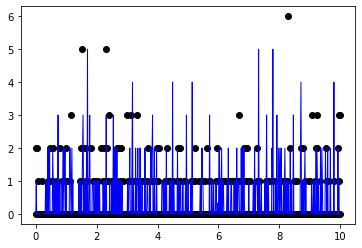

In [46]:
plt.scatter(np.linspace(0, 10, num=(y_test_Tree.size)),y_test_Tree,  color='black')
plt.plot(np.linspace(0, 10, num=(y_test_Tree.size)),RegTree.predict(X_test_Tree), color='blue', linewidth=1)
plt.show()

#### Dados normalizados

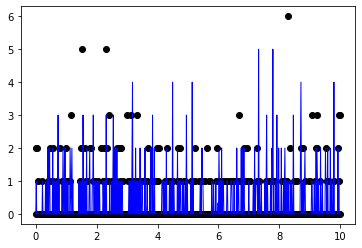

In [47]:
plt.scatter(np.linspace(0, 10, num=(y_test_Tree_N.size)),y_test_Tree_N,  color='black')
plt.plot(np.linspace(0, 10, num=(y_test_Tree_N.size)),RegTree_N.predict(X_test_Tree_N), color='blue', linewidth=1)
plt.show()

### Avaliação de desempenho do modelo - MAE, MSE e RMSE

#### Dados brutos

In [48]:
MAE_DT = mean_absolute_error (y_test_Tree , y_predicted_Tree)
print ("MAE_DT = {:0.3f}".format(MAE_DT))

MAE_DT = 0.587


In [49]:
MSE_DT = mean_squared_error (y_test_Tree , y_predicted_Tree)
print ("MSE_DT = {:0.3f}".format(MSE_DT))

MSE_DT = 1.053


In [50]:
RMSE_DT = np.sqrt(MSE_DT)
print ("RMSE_DT = {:0.3f}".format(RMSE_DT))

RMSE_DT = 1.026


#### Dados normalizados

In [51]:
MAE_DT_N = mean_absolute_error (y_test_Tree_N , y_predicted_Tree_N)
print ("MAE_DT_N = {:0.3f}".format(MAE_DT_N))

MAE_DT_N = 0.559


In [52]:
MSE_DT_N = mean_squared_error (y_test_Tree_N , y_predicted_Tree_N)
print ("MSE_DT_N = {:0.3f}".format(MSE_DT_N))

MSE_DT_N = 0.990


In [53]:
RMSE_DT_N = np.sqrt(MSE_DT_N)
print ("RMSE_DT_N = {:0.3f}".format(RMSE_DT_N))

RMSE_DT_N = 0.995


## 4º Modelo: Random Forest 

### Redefinição das variáveis de entrada e de saída

#### Dados brutos

In [54]:
X_RF = X
y_RF = y
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF, y_RF, test_size=0.30, random_state=0)
X_train_RF.shape, X_test_RF.shape, y_train_RF.shape, y_test_RF.shape

((1595, 61), (684, 61), (1595,), (684,))

#### Dados normalizados

In [55]:
X_RF_N = X_N
y_RF_N = y
X_train_RF_N, X_test_RF_N, y_train_RF_N, y_test_RF_N = train_test_split(X_RF_N, y_RF_N, test_size=0.30, random_state=0)
X_train_RF_N.shape, X_test_RF_N.shape, y_train_RF_N.shape, y_test_RF_N.shape

((1595, 61), (684, 61), (1595,), (684,))

### Associação do Modelo

#### Dados brutos

In [56]:
RegRF = RandomForestRegressor(n_estimators=30)

RegRF.fit(X_train_RF, y_train_RF)

y_predicted_RF = RegRF.predict(X_test_RF)
y_expected_RF  = y_test_RF

RegRF.score(X_train_RF, y_train_RF), RegRF.score(X_test_RF, y_predicted_RF)

(0.8331928040493893, 1.0)

#### Dados normalizados

In [57]:
RegRF_N = RandomForestRegressor(n_estimators=30)

RegRF_N.fit(X_train_RF_N, y_train_RF_N)

y_predicted_RF_N = RegRF_N.predict(X_test_RF_N)
y_expected_RF_N  = y_test_RF_N

RegRF_N.score(X_train_RF_N, y_train_RF_N), RegRF_N.score(X_test_RF_N, y_predicted_RF_N)

(0.8268791312237916, 1.0)

### Análise gráfica

#### Dados brutos

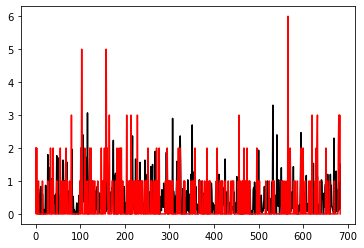

In [58]:
plt.plot(y_predicted_RF, '-', color='black', label= 'Valores Previstos')
plt.plot(y_expected_RF, '-', color = 'red', label= 'Valores Reais');

#plt.scatter(np.linspace(0, 10, num=(y_test_RNA.size)),y_test_RF,  color='black')
#plt.plot(np.linspace(0, 10, num=(y_test_RNA.size)),RNA.predict(X_test_RNA), color='blue', linewidth=1)
#plt.plot(np.linspace(0, 10, num=(y_test_RNA.size)),y_test_RF, color='black', linewidth=3)
#plt.plot(np.linspace(0, 10, num=(y_test_RNA_N.size)),RegRF.predict(X_test_RF), color='green', linewidth=1)
#plt.show()

#### Dados normalizados

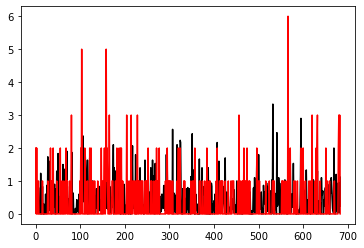

In [59]:
plt.plot(y_predicted_RF_N, '-', color='black', label= 'Valores Previstos')
plt.plot(y_expected_RF_N, '-', color = 'red', label= 'Valores Reais');

#plt.plot(np.linspace(0, 10, num=(y_test_RNA.size)),RNA.predict(X_test_RNA), color='blue', linewidth=1)
#plt.plot(np.linspace(0, 10, num=(y_test_RNA.size)),y_test_RF_N, color='black', linewidth=3)
#plt.plot(np.linspace(0, 10, num=(y_test_RNA_N.size)),RegRF_N.predict(X_test_RF_N), color='green', linewidth=1)
#plt.show()

### Avaliação de desempenho do modelo - MAE, MSE e RMSE

#### Dados brutos

In [60]:
MAE_RF = mean_absolute_error (y_expected_RF , y_predicted_RF)
print ("MAE_RF = {:0.3f}".format(MAE_RF))

MAE_RF = 0.532


In [61]:
MSE_RF = mean_squared_error (y_expected_RF , y_predicted_RF)
print ("MSE_RF = {:0.3f}".format(MSE_RF))

MSE_RF = 0.624


In [62]:
RMSE_RF = np.sqrt(MSE_RF)
print ("RMSE_RF = {:0.3f}".format(RMSE_RF))

RMSE_RF = 0.790


#### Dados normalizados

In [63]:
MAE_RF_N = mean_absolute_error (y_expected_RF_N , y_predicted_RF_N)
print ("MAE_RF_N = {:0.3f}".format(MAE_RF_N))

MAE_RF_N = 0.535


In [64]:
MSE_RF_N = mean_squared_error (y_expected_RF_N , y_predicted_RF_N)
print ("MSE_RF_N = {:0.3f}".format(MSE_RF_N))

MSE_RF_N = 0.617


In [65]:
RMSE_RF_N = np.sqrt(MSE_RF_N)
print ("RMSE_RF_N = {:0.3f}".format(RMSE_RF_N))

RMSE_RF_N = 0.785


## 5º Modelo: XGBoost 

### Redefinição das variáveis de entrada e de saída

#### Dados brutos

In [66]:
X_Boost = X
y_Boost = y
X_train_Boost, X_test_Boost, y_train_Boost, y_test_Boost = train_test_split(X_Boost, y_Boost, test_size=0.30, random_state=0)
X_train_Boost.shape, X_test_Boost.shape, y_train_Boost.shape, y_test_Boost.shape

((1595, 61), (684, 61), (1595,), (684,))

#### Dados normalizados 

In [67]:
X_Boost_N = X_N
y_Boost_N = y
X_train_Boost_N, X_test_Boost_N, y_train_Boost_N, y_test_Boost_N = train_test_split(X_Boost_N, y_Boost_N, test_size=0.30, random_state=0)
X_train_Boost_N.shape, X_test_Boost_N.shape, y_train_Boost_N.shape, y_test_Boost_N.shape

((1595, 61), (684, 61), (1595,), (684,))

### Definição do modelo XGBoost

In [68]:
model = XGBRegressor()
model_N = XGBRegressor()
model.fit(X_train_Boost, y_train_Boost, verbose=False)
model_N.fit(X_train_Boost_N, y_train_Boost_N, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Realização de previsões nos dados de teste

In [69]:
predictions = model.predict(X_test_Boost)
predictions_N = model_N.predict(X_test_Boost_N)

### Avaliação de desempenho do modelo - MAE, MSE e RMSE

#### Dados brutos

In [70]:
MAE_XGB = mean_absolute_error (predictions, y_test_Boost)
MSE_XGB = mean_squared_error (predictions, y_test_Boost)
RMSE_XGB = np.sqrt(MSE_XGB)
print ("MAE_XGB = {:0.3f}".format(MAE_XGB))
print("MSE_XGB = {:0.3f}".format(MSE_XGB))
print ("RMSE_XGB = {:0.3f}".format(RMSE_XGB))

MAE_XGB = 0.557
MSE_XGB = 0.706
RMSE_XGB = 0.840


#### Dados normalizados

In [71]:
MAE_XGB_N = mean_absolute_error (predictions_N, y_test_Boost_N)
MSE_XGB_N = mean_squared_error (predictions_N, y_test_Boost_N)
RMSE_XGB_N = np.sqrt(MSE_XGB_N)
print ("MAE_XGB_N = {:0.3f}".format(MAE_XGB_N))
print("MSE_XGB_N = {:0.3f}".format(MSE_XGB_N))
print ("RMSE_XGB_N = {:0.3f}".format(RMSE_XGB_N))

MAE_XGB_N = 0.553
MSE_XGB_N = 0.701
RMSE_XGB_N = 0.837
